In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
raw_hic_path = '/data1/lmh_data/MINE/use_data/GM12878/hr'
epi_path = '/data1/lmh_data/MINE/use_data/GM12878/ATAC_H3K27ac_H3K4me3/epi'

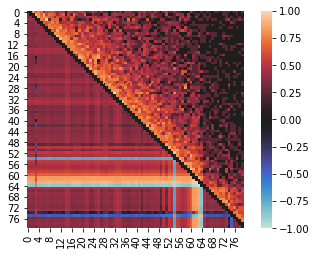

In [3]:
chrom, index, x, y = 8, 224, 320, 400
filename = 'chr{}_1000b.npz'.format(chrom)
hic = np.load(os.path.join(raw_hic_path, filename))['hic']
epi = np.load(os.path.join(epi_path, filename))['epi']

_epi_matrix = np.triu(epi[index, 0, x:y, x:y], 1).T
_negative = _epi_matrix < 0
_epi_matrix[_negative] *= -1
_epi_matrix = np.log1p(_epi_matrix)
_epi_matrix = _epi_matrix/_epi_matrix.max()
_epi_matrix[_negative] *= -1
_hic_matrix = np.log1p(np.triu(hic[index, 0, x:y, x:y], 2))
_hic_matrix = _hic_matrix/_hic_matrix.max()
sns.heatmap(_epi_matrix+_hic_matrix, square=True, center=0)
plt.savefig('figure_file/hic_epi_matrix(NBN gene).pdf', format='pdf', bbox_inches='tight')
plt.show()

In [4]:
all_hr_sig = np.load('../fig2/temp/GM12878_ATAC_H3K27ac_H3K4me3_2_100_all_hr_sig.npy', allow_pickle=True).item()

def read_chipseq_file(path):
    _peaks = dict()
    with open(path)as f:
        for line in f:
            datas = line.strip().split()
            left, right = int(int(datas[1])/1000), int(int(datas[2])/1000)
            peaks = list(range(left, right+1))
            if datas[0] not in _peaks.keys():
                _peaks[datas[0]] = set()
            for i in peaks:
                _peaks[datas[0]].add(i)
    return _peaks

CTCF = read_chipseq_file('/data1/lmh_data/MINE/source/GM12878/CTCF_peaks.bed')
ATAC = read_chipseq_file('/data1/lmh_data/MINE/source/GM12878/ATAC_peaks.bed')
H3K27me3 = read_chipseq_file('/data1/lmh_data/MINE/source/GM12878/H3K27me3_peaks.bed')
H3K27ac = read_chipseq_file('/data1/lmh_data/MINE/source/GM12878/H3K27ac_peaks.bed')

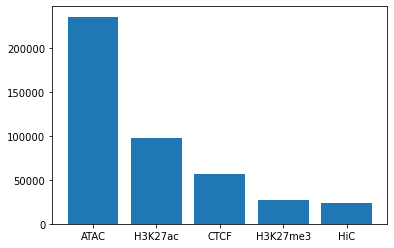

In [5]:
raw_sigs, CTCF_peaks, ATAC_peaks, H3K27me3_peaks, H3K27ac_peaks = 0, 0, 0, 0, 0
for key in all_hr_sig.keys():
    raw_sigs += len(all_hr_sig[key])
    CTCF_peaks += len(CTCF['chr{}'.format(key)])
    ATAC_peaks += len(ATAC['chr{}'.format(key)])
    H3K27me3_peaks += len(H3K27me3['chr{}'.format(key)])
    H3K27ac_peaks += len(H3K27ac['chr{}'.format(key)])

num_list = [ATAC_peaks, H3K27ac_peaks, CTCF_peaks, H3K27me3_peaks, raw_sigs]
plt.bar(['ATAC', 'H3K27ac', 'CTCF', 'H3K27me3', 'HiC'], num_list)
plt.savefig('figure_file/Compare information.pdf', format='pdf', bbox_inches='tight')
plt.show()